<a href="https://colab.research.google.com/github/Shivesh21122000/Mini-Project--Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification

In [7]:
!pip install ipython-autotime
%load_ext autotime

time: 182 µs


In [ ]:
#First we will start with taking images from bing image downloader

In [24]:
!pip install bing_image_downloader

In [25]:
!mkdir images1

In [26]:
from bing_image_downloader import downloader
downloader.download("sunflowers", limit=30, output_dir='images1', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from http://cooldigitalphotography.com/wp-content/uploads/2013/11/Sunflower10.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.wildtattooart.com/wp-content/uploads/2017/03/sunflower-tattoos-19031712.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.hdwallpapers.in/download/pure_red_sunflowers-1920x1200.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://decor4all.com/wp-content/uploads/2015/07/sunflower-floral-arrangements-wedding-decorating-ideas-15.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.vangoghgallery.com/catalog/image/0286/Vase-with-Asters,-Salvia-and-Other-Flowers.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/55/35/3c/55353c1d817c6ffb1ee505ecbc9d3ccc--field-of-sunflowers-sunflower-fields.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.hdwallpapers.in/download/gorg

In [27]:
from bing_image_downloader import downloader
downloader.download("leather rugby balls", limit=30, output_dir='images1', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from https://www.john-woodbridge.com/1032-large_default/1920s-rugby-ball.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://d2gg9evh47fn9z.cloudfront.net/800px_COLOURBOX19116091.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://static.vecteezy.com/system/resources/previews/000/076/275/original/vector-rugby-ball.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://img.bidorbuy.co.za/image/upload/user_images/720/318720_110206113942_IMG_6190.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://cdn.shopify.com/s/files/1/0068/0227/6407/products/2600_20RDAD19_2045082405_20Ball_20Replica_20Wales_20Sz5_1024x1024.jpg?v=1553529763
[!] Issue getting: http://cdn.shopify.com/s/files/1/0068/0227/6407/products/2600_20RDAD19_2045082405_20Ball_20Replica_20Wales_20Sz5_1024x1024.jpg?v=1553529763
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #5 from https://

In [28]:
from bing_image_downloader import downloader
downloader.download("ice cream cones", limit=30, output_dir='images1', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 8 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/8b/e5/69/8be569e442e761e63e8fc3c0d7c154d0--waffle-cone-smores-smores-cones.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.seriouseats.com/images/2014/06/20140613-Chocolate-Dip-kingcone-vicky-wasik-14.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://aspottedpony.com/wp-content/uploads/2013/02/castlecake4.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.guinnessworldrecords.com/Images/Most-ice-cream-scoops-balanced-on-a-cone-header_tcm25-387618.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.narcity.com/u/2017/10/31/32ed0fc21991a5f1ea52bda6327681ea50a2cc8c.jpg_1200x630.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.fodors.com/wp-content/uploads/2019/01/01_Unicorn_Food_LittleDamage_UnicornTears_01.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://cdn.foodbeast.com

In [22]:
# We have collected images.... Now we will start with our preprocessing part

In [29]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR = '/content/images1'
CATEGORIES = ['sunflowers','leather rugby balls','ice cream cones']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array, (150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data= np.array(flat_data)
target= np.array(target)
images=np.array(images)



<BarContainer object of 3 artists>

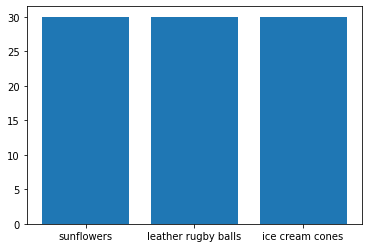

In [30]:
unique, count= np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1,
       2, 0, 0, 0, 1])

In [34]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
accuracy_score(y_pred,y_test)

1.0

time: 3.28 ms


In [35]:
confusion_matrix(y_pred,y_test)

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  8]])

time: 4 ms


In [36]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [38]:
model = pickle.load(open('img_model.p','rb'))

Enter the url of imagehttps://i.etsystatic.com/5219063/r/il/4cdd58/1095201169/il_570xN.1095201169_p2oa.jpg
(428, 570, 3)
Predicted Output: leather rugby balls


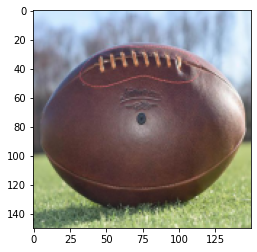

In [41]:
flat_data=[]
url=input('Enter the url of image')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print('Predicted Output: {}'.format(y_out))


Finally we have predicted our image accurately.
This is the end of our project.